# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Download, Load & Explore Data

In [3]:
df = pd.read_csv("E:\\Codes\\Machine Learning\\projects\\data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#number of rows and columns:
df.shape

(569, 33)

In [ ]:
# number of null(empty) values
df.isna().sum()

In [7]:
# Droppng the column with null values
df.dropna(axis =1, inplace = True)
df.shape

(569, 32)

In [8]:
#Checking the no. of Malignant and Benign diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Label Encoding

In [9]:
# We need to encode the diagnosis column into some integer values :
labelEncoder = LabelEncoder()
df.iloc[:, 1] = labelEncoder.fit_transform(df.iloc[:,1].values)  # _____Mapping  M: 1 and B : 0__________ 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Splitting Dataset & Feature Scaling

In [69]:
X = df.iloc[:,2:].values
y = df.iloc[:, 1].values
train_X , test_X, train_y, test_y = train_test_split(X,y , test_size=0.2) 

In [70]:
# Scaling the data 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_y = labelEncoder.fit_transform(train_y)
test_y = test_y.astype(int)

# Building a Logistic Regression Model

In [71]:
Lclassifier = LogisticRegression()
Lclassifier.fit(train_X, train_y)
prediction = Lclassifier.predict(test_X)
print(test_y)
print(prediction)

[0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 1 1]
[0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 1 1]


# Performance Evaluation

[[67  0]
 [ 4 43]]


<Axes: >

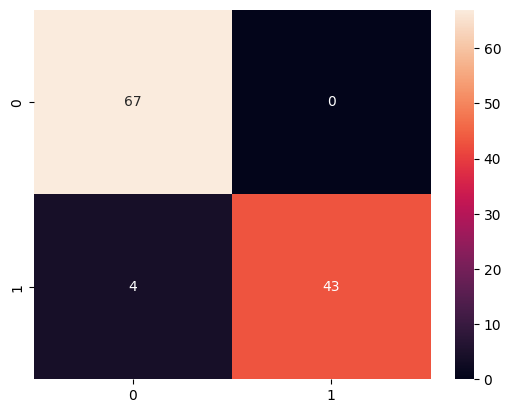

In [72]:
#plotting a confusion matrix and visualizing through a heatmap the values of TruePositive, TrueNegative, FalsePositive, FalseNegative
cMatrix = confusion_matrix(test_y, prediction)
print(cMatrix)
sbn.heatmap(cMatrix, annot= True)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.9649122807017544

# End 